In [1]:
print("Hello")

Hello


In [ ]:
!pip install urlextract

In [2]:
import re
import pandas as pd


In [3]:
f= open("WhatsApp Chat with Engineer Talks' Group 5✨.txt","r",encoding="utf-8")

In [4]:
data=f.read()

In [5]:
print(data)

23/10/2021, 3:23 pm - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
23/10/2021, 8:17 pm - +92 335 2606092 left
24/10/2021, 8:59 am - +92 301 5130736: Have you missed Engineer talks webinar on " Kickstart Leadership "? By Kamran Z. Rizvi 

 Don't worry, we have uploaded the recording on demand for your convenience. Watch it in your own time and feel free to share with your friends and colleagues as well. 
Link of session  https://youtu.be/hRDk-s8sFNM
30/10/2021, 12:36 pm - +92 347 4411229 left
03/11/2021, 5:42 am - +92 347 3321843 left
04/11/2021, 12:57 pm - +92 343 1905776 left
04/11/2021, 5:44 pm - +92 336 2206682: <Media omitted>
04/11/2021, 6:16 pm - +92 316 8479482: ❤️❤️
04/11/2021, 7:49 pm - +92 347 5076404: <Media omitted>
04/11/2021, 9:22 pm - +92 309 4893554 left
04/11/2021, 10:13 pm - +92 331 5609822 left
05/11/2021, 12:51 pm - +92 347 0609519 left
12/11/2021, 10:36 am - +92 336 22066

In [6]:
pattern = r'\[\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}:\d{2}\s[A-Za-z][A-Za-z]]\s'
pattern1 = r'\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[A-Za-z][A-Za-z]\s-\s'

In [7]:
messages=re.split(pattern1,data)[1:]
len(messages)

208

In [8]:
dates=re.findall(pattern1,data)
dates

['23/10/2021, 3:23\u202fpm - ',
 '23/10/2021, 8:17\u202fpm - ',
 '24/10/2021, 8:59\u202fam - ',
 '30/10/2021, 12:36\u202fpm - ',
 '03/11/2021, 5:42\u202fam - ',
 '04/11/2021, 12:57\u202fpm - ',
 '04/11/2021, 5:44\u202fpm - ',
 '04/11/2021, 6:16\u202fpm - ',
 '04/11/2021, 7:49\u202fpm - ',
 '04/11/2021, 9:22\u202fpm - ',
 '04/11/2021, 10:13\u202fpm - ',
 '05/11/2021, 12:51\u202fpm - ',
 '12/11/2021, 10:36\u202fam - ',
 '12/11/2021, 10:36\u202fam - ',
 '12/11/2021, 6:27\u202fpm - ',
 '12/11/2021, 6:41\u202fpm - ',
 '12/11/2021, 6:41\u202fpm - ',
 '12/11/2021, 6:42\u202fpm - ',
 '12/11/2021, 6:42\u202fpm - ',
 '12/11/2021, 6:46\u202fpm - ',
 '13/11/2021, 10:39\u202fam - ',
 '13/11/2021, 12:45\u202fpm - ',
 '13/11/2021, 8:35\u202fpm - ',
 '13/11/2021, 9:07\u202fpm - ',
 '13/11/2021, 9:07\u202fpm - ',
 '13/11/2021, 11:02\u202fpm - ',
 '20/11/2021, 9:37\u202fpm - ',
 '20/11/2021, 9:37\u202fpm - ',
 '20/11/2021, 9:38\u202fpm - ',
 '20/11/2021, 9:43\u202fpm - ',
 '20/11/2021, 9:45\u202fpm - ',

In [9]:
df = pd.DataFrame({'user_message': messages, 'message_date': dates})

In [ ]:
# Function to clean and convert date string
def clean_date(date_str):
    # Remove square brackets and any extra spaces
   #cleaned_str = date_str.strip('[] ')
    # Replace any non-standard spaces with standard spaces
    #cleaned_str = re.sub(r'\s+', ' ', cleaned_str)
    # Parse the cleaned date string
    return pd.to_datetime(cleaned_str, format='%d/%m/%Y, %H:%M %p')

# Apply the function to the DataFrame column
df['message_date'] = df['message_date'].apply(clean_date)

In [11]:
df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%Y, %H:%M %p - ')

df.rename(columns={'message_date':'date'},inplace=True)
df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2021-10-23 03:23:00
1,+92 335 2606092 left\n,2021-10-23 08:17:00
2,+92 301 5130736: Have you missed Engineer talk...,2021-10-24 08:59:00
3,+92 347 4411229 left\n,2021-10-30 12:36:00
4,+92 347 3321843 left\n,2021-11-03 05:42:00


In [12]:
df.shape

(208, 2)

In [13]:
users = []
messages = []
for message in df['user_message']:
    entry = re.split(r'([\w\W]+?):\s', message)
    if entry[1:]:  # user name
        users.append(entry[1])
        messages.append(" ".join(entry[2:]))
    else:
        users.append('group_notification')
        messages.append(entry[0])

df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'], inplace=True)
df.head()

,date,user,message
0,2021-10-23 03:23:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2021-10-23 08:17:00,group_notification,+92 335 2606092 left\n
2,2021-10-24 08:59:00,+92 301 5130736,"Have you missed Engineer talks webinar on "" Ki..."
3,2021-10-30 12:36:00,group_notification,+92 347 4411229 left\n
4,2021-11-03 05:42:00,group_notification,+92 347 3321843 left\n


In [14]:
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month_name()
df['day']=df['date'].dt.day
df['hour']=df['date'].dt.hour
df['minute']=df['date'].dt.minute

In [15]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2021-10-23 03:23:00,group_notification,Messages and calls are end-to-end encrypted. N...,2021,October,23,3,23
1,2021-10-23 08:17:00,group_notification,+92 335 2606092 left\n,2021,October,23,8,17
2,2021-10-24 08:59:00,+92 301 5130736,"Have you missed Engineer talks webinar on "" Ki...",2021,October,24,8,59
3,2021-10-30 12:36:00,group_notification,+92 347 4411229 left\n,2021,October,30,12,36
4,2021-11-03 05:42:00,group_notification,+92 347 3321843 left\n,2021,November,3,5,42


In [16]:
df['user']=='group_notification'

0       True
1       True
2      False
3       True
4       True
       ...  
203     True
204     True
205     True
206     True
207     True
Name: user, Length: 208, dtype: bool

In [17]:
word=[]
for msg in df['message']:
    word.extend(msg.split())

len(word)

5576

In [18]:

df[df['message']=='<Media omitted>\n'].shape[0]

38

In [19]:
df['message']

0      Messages and calls are end-to-end encrypted. N...
1                                 +92 335 2606092 left\n
2      Have you missed Engineer talks webinar on " Ki...
3                                 +92 347 4411229 left\n
4                                 +92 347 3321843 left\n
                             ...                        
203    New members need admin approval to join this g...
204    +92 330 2445122 changed their phone number to ...
205         +92 311 3291817 changed to +44 7768 216243\n
206         +44 7768 216243 changed to +44 7470 014001\n
207        +92 333 2638125 changed to +49 1575 8646505\n
Name: message, Length: 208, dtype: object

In [20]:
from urlextract import URLExtract
extractor=URLExtract()
url=extractor.find_urls("let's www.google.com have URL gmail.com")
url

['www.google.com', 'gmail.com']

In [ ]:
links = []
for message in df['message']:
        links.extend(extract.find_urls(message))

In [26]:
x=df['user'].value_counts().head()

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

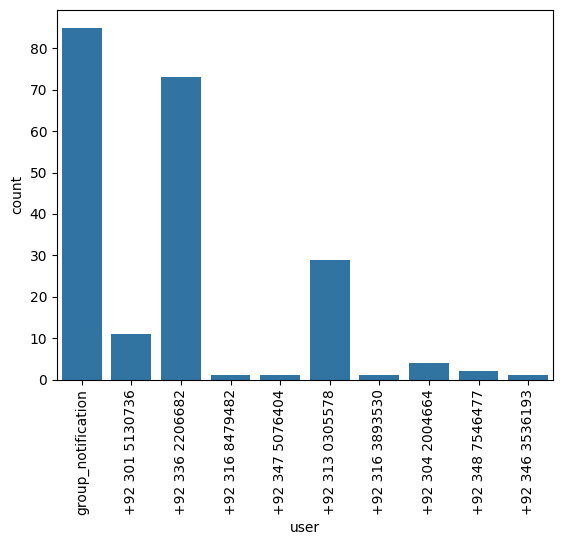

In [34]:
name=x.index
count=x.values
sns.countplot(data=df,x="user")
plt.xticks(rotation="vertical")
plt.show()